<a href="https://colab.research.google.com/github/vishnupal-code/zomato-data-analysis/blob/main/Cuisine_Rating_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!ls /content/drive/MyDrive/Cleaned_zomato_csv/

'cleaned_zomato_data (1).csv'


In [4]:
import pandas as pd

# Load from Google Drive (adjust path if your CSV is in a folder)

# Add the .csv extension to the file path
file_path = '/content/drive/MyDrive/Cleaned_zomato_csv/cleaned_zomato_data (1).csv'
df = pd.read_csv(file_path)

df.head()

,Address,Restaurant_Name,Online_Order,Book_Table,Rating,Votes,Location,Rest_Type,dish_liked,approx_cost(for two people),listed_in(type),listed_in(city),cuisines_list
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",800.0,Buffet,Banashankari,"['North Indian', ' Mughlai', ' Chinese']"
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",800.0,Buffet,Banashankari,"['Chinese', ' North Indian', ' Thai']"
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...",800.0,Buffet,Banashankari,"['Cafe', ' Mexican', ' Italian']"
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,300.0,Buffet,Banashankari,"['South Indian', ' North Indian']"
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe",600.0,Buffet,Banashankari,"['North Indian', ' Rajasthani']"


In [5]:
df.columns


Index(['Address', 'Restaurant_Name', 'Online_Order', 'Book_Table', 'Rating',
       'Votes', 'Location', 'Rest_Type', 'dish_liked',
       'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)',
       'cuisines_list'],
      dtype='object')

In [6]:
# Group by cuisine and calculate averages
cuisine_grouped = df.groupby('cuisines_list').agg({
    'Rating': 'mean',
    'Votes': 'mean',
    'approx_cost(for two people)': 'mean'
}).reset_index()

# Round values for clarity
cuisine_grouped = cuisine_grouped.round(2)

# Rename columns for display
cuisine_grouped.columns = ['Cuisine', 'Avg_Rating', 'Avg_Votes', 'Avg_Cost']


In [7]:
# Top 10 cuisines by rating
top_rated_cuisines = cuisine_grouped.sort_values(by='Avg_Rating', ascending=False).head(10)

# Top 10 cuisines by votes
top_voted_cuisines = cuisine_grouped.sort_values(by='Avg_Votes', ascending=False).head(10)


<ipython-input-8-a77134319816>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_rated_cuisines, y='Cuisine', x='Avg_Rating', palette='Blues_d')


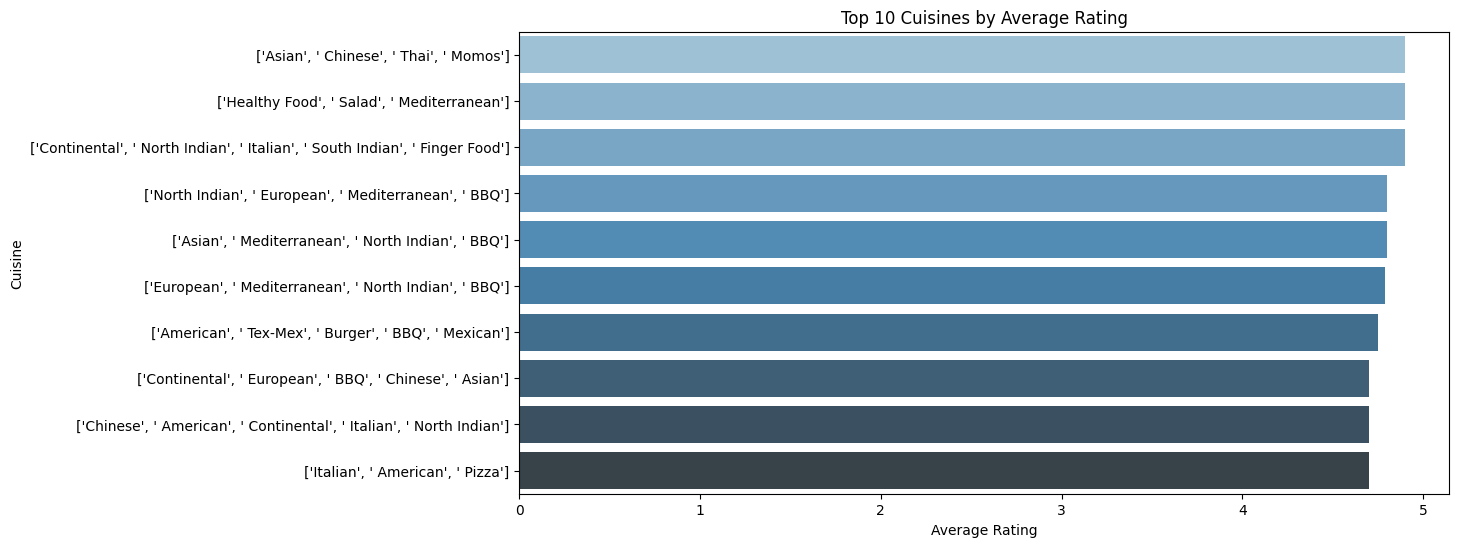

<ipython-input-8-a77134319816>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_voted_cuisines, y='Cuisine', x='Avg_Votes', palette='Oranges')


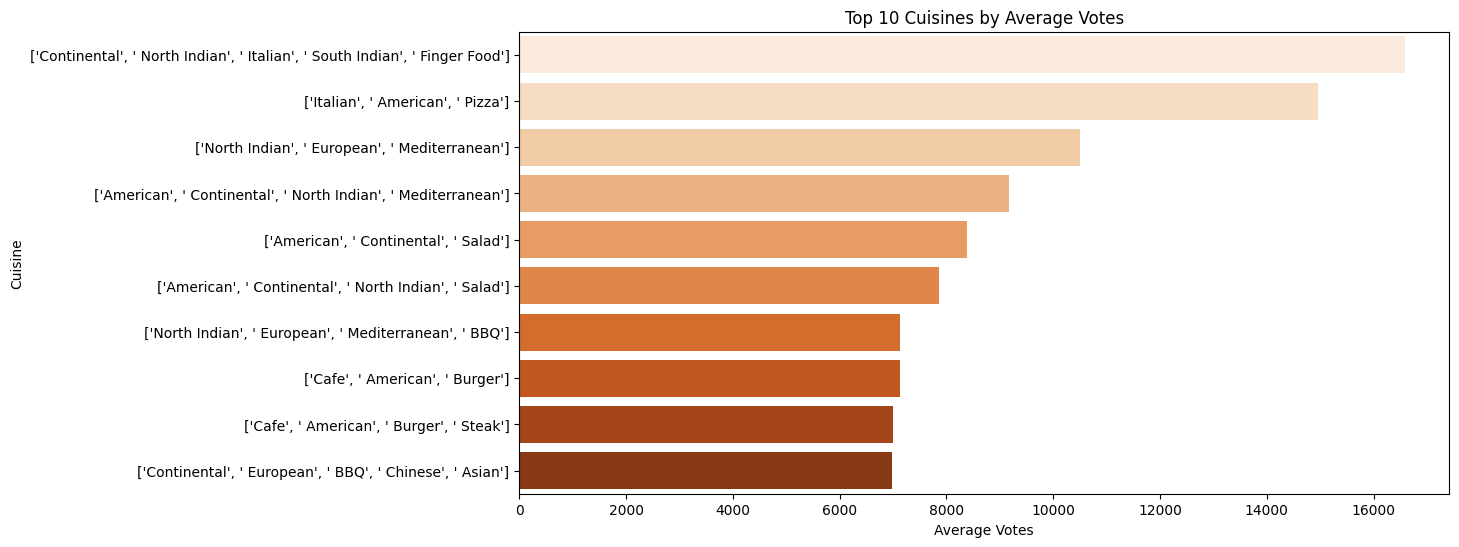

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 by rating
plt.figure(figsize=(12, 6))
sns.barplot(data=top_rated_cuisines, y='Cuisine', x='Avg_Rating', palette='Blues_d')
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()

# Top 10 by votes
plt.figure(figsize=(12, 6))
sns.barplot(data=top_voted_cuisines, y='Cuisine', x='Avg_Votes', palette='Oranges')
plt.title('Top 10 Cuisines by Average Votes')
plt.xlabel('Average Votes')
plt.ylabel('Cuisine')
plt.show()


In [9]:
# Task 13: Best-Rated Restaurants and Associated Cuisine

# restaurants with more than 50 votes
top_restaurants = df[df['Votes'] > 50].sort_values(by='Rating', ascending=False)

# Select relevant columns and drop duplicates
top_restaurants = top_restaurants[['Restaurant_Name', 'cuisines_list', 'Rating', 'Votes']].drop_duplicates(subset='Restaurant_Name').head(10)

# Display top 10 best-rated restaurants
top_restaurants


,Restaurant_Name,cuisines_list,Rating,Votes
42381,Belgian Waffle Factory,['Desserts'],4.9,1750
37613,Asia Kitchen By Mainland China,"['Asian', ' Chinese', ' Thai', ' Momos']",4.9,2256
3921,Byg Brewski Brewing Company,"['Continental', ' North Indian', ' Italian', '...",4.9,16345
37099,AB's - Absolute Barbecues,"['European', ' Mediterranean', ' North Indian'...",4.9,6490
7118,Punjab Grill,['North Indian'],4.9,518
51042,Flechazo,"['Asian', ' Mediterranean', ' North Indian', '...",4.9,3004
18496,Milano Ice Cream,"['Ice Cream', ' Desserts']",4.9,2090
45812,SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,"['Healthy Food', ' Salad', ' Mediterranean']",4.9,246
41533,The Boozy Griffin,"['European', ' Continental']",4.8,4696
21282,Barbeque Nation,"['North Indian', ' European', ' Mediterranean'...",4.8,3864


<ipython-input-10-045a09c30636>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_cuisines.values, y=popular_cuisines.index, palette='pastel')


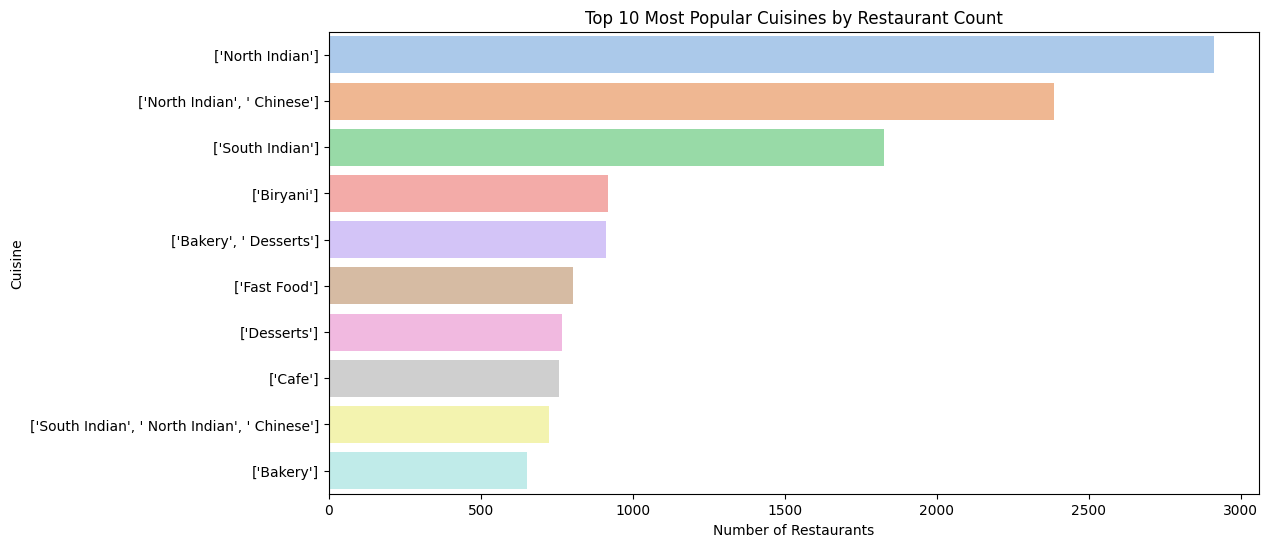

In [10]:
# Task 14: Generate Insights into User Preferences by cuisine_grouped

# Count how many times each cuisine appears
popular_cuisines = df['cuisines_list'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=popular_cuisines.values, y=popular_cuisines.index, palette='pastel')
plt.title('Top 10 Most Popular Cuisines by Restaurant Count')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.show()
